(CONFIDENTIAL) INTERNAL USE ONLY, NOT FOR EXTERNAL DISTRIBUTION

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Clustering

In [2]:
import sklearn as sk
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from sklearn import datasets
from sklearn import cluster

## Kmeans

In [4]:
# Create blob dataset
X, y = datasets.make_blobs(
    n_samples=1500,
    n_features=2,
    centers=5,
    random_state=1
)

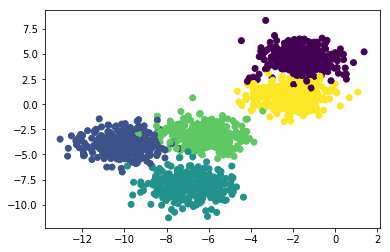

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [23]:
kmeans = cluster.KMeans(n_clusters=3)

In [31]:
ypred = kmeans.predict(X)

In [8]:
# kmeans.labels_
# kmeans.inertia_

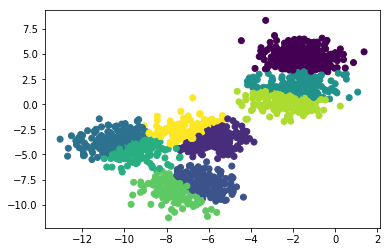

In [32]:
plt.scatter(X[:, 0], X[:, 1], c=ypred)
plt.show()

In [22]:
#优化
# kmeans.labels_
# kmeans.inertia_

AttributeError: 'KMeans' object has no attribute 'inertia_'

### Kmeans is sensitive to the number of centroids: How to find the best K?

In [24]:
# 关键问题：如何选择K
# Elbow method
# inertia_: distance sum
# 准则函数, cost function -> ppt

ks = list(range(1, 10))
costs = []

for k in ks:
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X)
    cost = kmeans.inertia_
    costs.append(cost)
    print("k={}: cost={}".format(k, cost))

k=1: cost=45569.11993015371
k=2: cost=11702.565551517817
k=3: cost=7214.134467960745
k=4: cost=4999.75505703267
k=5: cost=2842.0407158539433
k=6: cost=2625.626642381323
k=7: cost=2411.0787494674696
k=8: cost=2207.9563042571044
k=9: cost=2022.134293626419


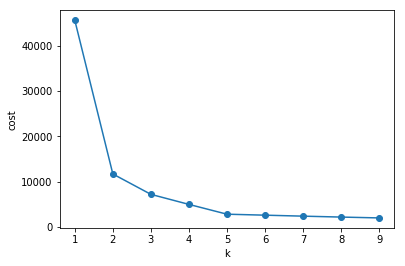

In [33]:
plt.plot(ks, costs, '-o')
plt.xlabel("k")
plt.ylabel("cost")
plt.show()
#choose 5, as 5/6 seem no change.

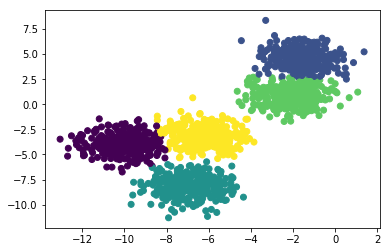

In [14]:
kmeans = cluster.KMeans(n_clusters=5)
ypred = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=ypred)
plt.show()

### Kmeans 对数据分布的敏感度

#### Anisotropic

In [34]:
T = np.array([[0.6, -0.636], [-0.40, 0.85]])

Xani, yani = datasets.make_blobs(
    n_samples=1500,
    n_features=2,
    centers=3,
    cluster_std=0.4,
    random_state=2020)

Xani = Xani.dot(T)

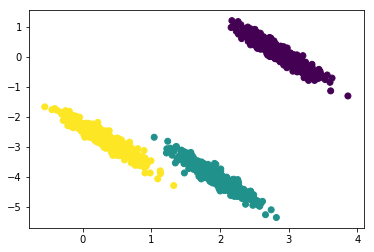

In [35]:
plt.scatter(Xani[:, 0], Xani[:, 1], c=yani)
plt.show()

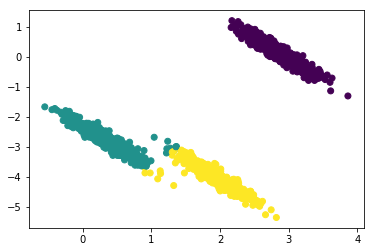

In [36]:
kmeans = cluster.KMeans(n_clusters=3)
ypred = kmeans.fit_predict(Xani)
plt.scatter(Xani[:, 0], Xani[:, 1], c=ypred)
plt.show()

In [ ]:
#画圆, 所以对竖长型的cluster不太好

#### Circle

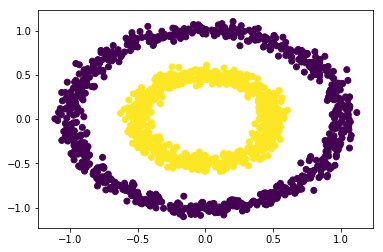

In [37]:
Xcircle, ycircle = datasets.make_circles(n_samples=1500, factor=.5, noise=0.05, random_state=1)

plt.scatter(Xcircle[:, 0], Xcircle[:, 1], c=ycircle)
plt.show()

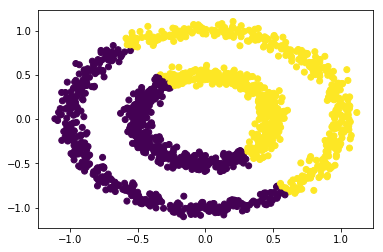

In [41]:
kmeans = cluster.KMeans(n_clusters=2)
ypred = kmeans.fit_predict(Xcircle)
plt.scatter(Xcircle[:, 0], Xcircle[:, 1], c=ypred)
plt.show()

##### But at the very beginning we don't know the shapes, therefore K-means is almost useless

## DBSCAN

### Anisotropic data

In [42]:
X, y = datasets.make_blobs(
    n_samples=1500,
    n_features=2,
    centers=3,
    cluster_std=1.0,
    random_state=170)

print(X.shape)

(1500, 2)


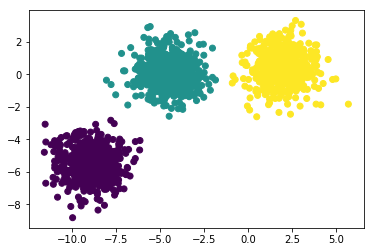

In [43]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [44]:
dbscan = cluster.DBSCAN(eps=0.7, min_samples=5)

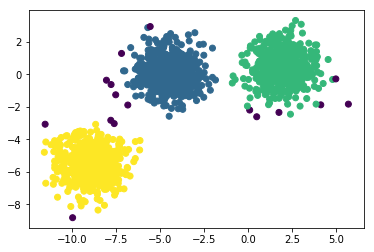

In [45]:
ypred = dbscan.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=ypred)
plt.show()

### anisotropic data

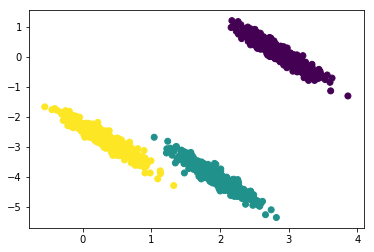

In [46]:
plt.scatter(Xani[:, 0], Xani[:, 1], c=yani)

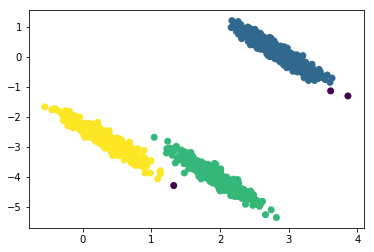

In [68]:
dbscan = cluster.DBSCAN(eps=0.28, min_samples=5)
yani_pred = dbscan.fit_predict(Xani)
plt.scatter(Xani[:, 0], Xani[:, 1], c=yani_pred)

In [60]:
nbrs = sk.neighbors.NearestNeighbors(n_neighbors=10).fit(Xani)

In [61]:
dist, indices = nbrs.kneighbors(Xani)

In [62]:
dist.shape

(1500, 10)

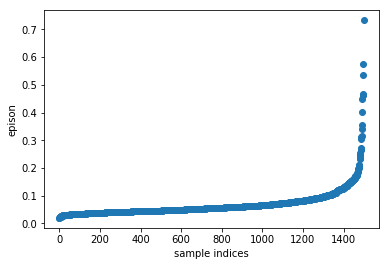

In [67]:
k_dists = np.sort(dist[:, -1])
plt.plot(k_dists, 'o')
plt.xlabel("sample indices")
plt.ylabel("epison")
plt.show()

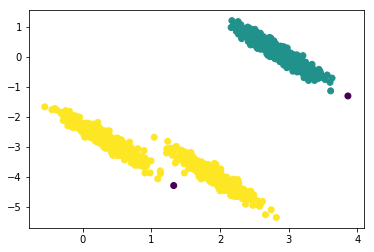

In [72]:
dbscan = cluster.DBSCAN(eps=0.4, min_samples=10)
yani_pred = dbscan.fit_predict(Xani)
plt.scatter(Xani[:, 0], Xani[:, 1], c=yani_pred)

In [73]:
np.unique(dbscan.labels_)

array([-1,  0,  1])

In [74]:
import collections

In [75]:
collections.Counter(dbscan.labels_.tolist())

Counter({-1: 2, 0: 499, 1: 999})

In [76]:
outliers_indices = []
for idx, label in enumerate(dbscan.labels_):
    if label == -1:
        outliers_indices.append(idx)

In [77]:
print outliers_indices

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(outliers_indices)? (<ipython-input-77-1af886a33ff4>, line 1)

### circle data

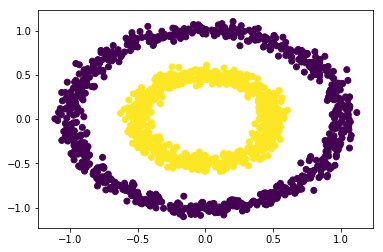

In [69]:
plt.scatter(Xcircle[:, 0], Xcircle[:, 1], c=ycircle)

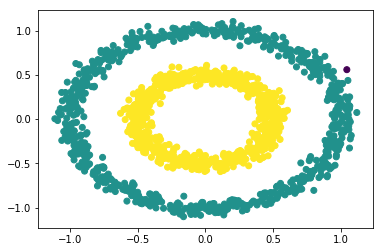

In [82]:
dbscan = cluster.DBSCAN(eps=0.1, min_samples=5)
ycircle_dbscan = dbscan.fit_predict(Xcircle)
plt.scatter(Xcircle[:, 0], Xcircle[:, 1], c=ycircle_dbscan)

In [83]:
nbrs = sk.neighbors.NearestNeighbors(n_neighbors=10).fit(Xcircle)

In [84]:
dist, _ = nbrs.kneighbors(Xcircle)

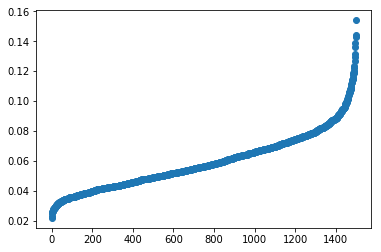

In [85]:
k_dists = dist[:, -1]
k_dists = np.sort(k_dists)
plt.plot(k_dists, 'o')
plt.show()

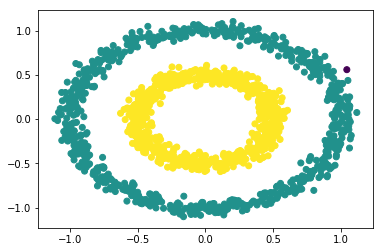

In [86]:
dbscan = cluster.DBSCAN(eps=0.1, min_samples=10)
ycircle_dbscan = dbscan.fit_predict(Xcircle)
plt.scatter(Xcircle[:, 0], Xcircle[:, 1], c=ycircle_dbscan)

### Find the proper eps for DBSCAN 

In [ ]:
# k-dist curve

In [ ]:
# sk.neighbors.NearestNeighbors

## Aggomerative clustering

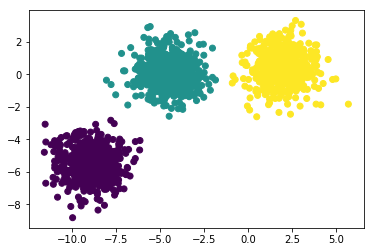

In [87]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [99]:
agg_clustering = cluster.AgglomerativeClustering(n_clusters=5)

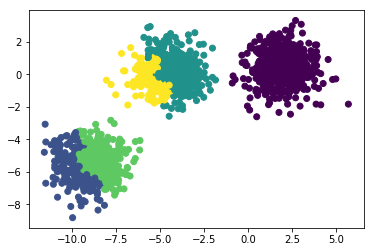

In [100]:
ypred = agg_clustering.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=ypred)
plt.show()

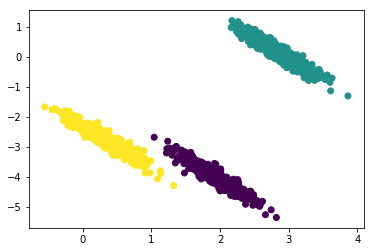

In [97]:
agg_clustering = cluster.AgglomerativeClustering(n_clusters=3)
ypred_ani = agg_clustering.fit_predict(Xani)
plt.scatter(Xani[:, 0], Xani[:, 1], c=ypred_ani)
plt.show()

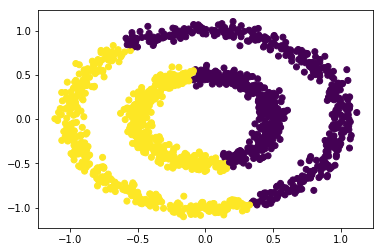

In [98]:
agg_clustering = cluster.AgglomerativeClustering(n_clusters=2)
ycircle_agg = agg_clustering.fit_predict(Xcircle)
plt.scatter(Xcircle[:, 0], Xcircle[:, 1], c=ycircle_agg)

## Gaussian Mixure

In [101]:
from sklearn import mixture

In [115]:
gmm = mixture.GaussianMixture(n_components=3)

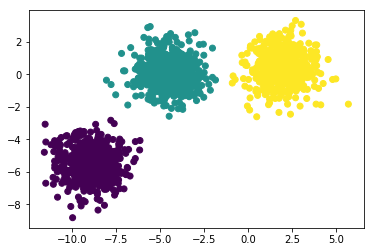

In [116]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

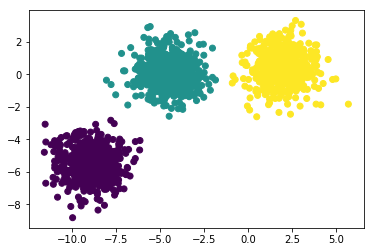

In [117]:
gmm.fit(X)
ypred = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=ypred)
plt.show()

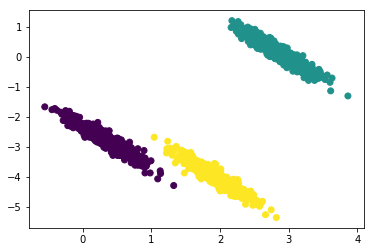

In [107]:
gmm = mixture.GaussianMixture(n_components=3)
gmm.fit(Xani)
ypred_ani = gmm.predict(Xani)

plt.scatter(Xani[:, 0], Xani[:, 1], c=ypred_ani)
plt.show()

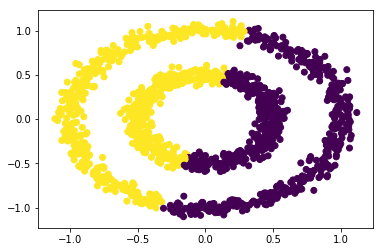

In [108]:
gmm = mixture.GaussianMixture(n_components=2)
gmm.fit(Xcircle)
ypred_circle = gmm.predict(Xcircle)
plt.scatter(Xcircle[:, 0], Xcircle[:, 1], c=ypred_circle)
plt.show()

# Outlier detection

In [118]:
from sklearn import covariance

In [119]:
## one-class SVM (novelty detection)
## EclipseEnvelop (outlier detection)

In [120]:
# define a dataset with in & out datasets
# inlier, outlier
n_in = 100
n_out = 20
offset = np.array([1, 1]) * 0.1 
X1 = np.random.randn(n_in, 2) + offset
X2 = np.random.randn(n_in, 2) - offset

Xout = np.random.uniform(low=-6, high=6, size=(n_out, 2))
X = np.vstack([X1, X2, Xout])
print(X.shape)

(220, 2)


In [ ]:
# X

In [ ]:
sk.svm.OneClassSVM?

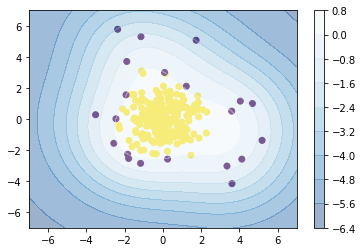

In [121]:
model = sk.svm.OneClassSVM(kernel='rbf', nu=0.1, gamma=0.1)
model.fit(X)
xx, yy = np.meshgrid(np.linspace(-7, 7, 500), np.linspace(-7, 7, 500))

# plt.scatter(np.vstack([X1, X2])[:,0], 
#             np.vstack([X1, X2])[:,1], 
#             c=model.predict(np.vstack([X1, X2])))
plt.scatter(X[:,0], X[:,1], c=model.predict(X))

Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r, alpha=0.4)
plt.colorbar()
plt.show()

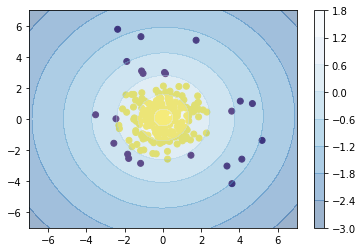

In [122]:
model = covariance.EllipticEnvelope(contamination=0.1, random_state=2020)
model.fit(X)
xx, yy = np.meshgrid(np.linspace(-7, 7, 500), np.linspace(-7, 7, 500))

plt.scatter(X[:,0], X[:,1], c=model.predict(X))

Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r, alpha=0.4)
plt.colorbar()
plt.show()